# Entropy

Entropy, in the context of information theory, measures the uncertainty or randomness in a probability distribution. The formula for entropy 𝐻 of a probability distribution is given by:

H=− 
i
∑
​
 p 
 i
​
 log(p 
i
​
 )
 
 Where 
𝑝
𝑖
are the probabilities of different outcomes in the distribution.

Here’s how you can define a function in Julia to compute the entropy of a probability distribution:

In [1]:
using Statistics

function entropy(probabilities::Vector{Float64})
    # Ensure probabilities sum to 1
    if !isapprox(sum(probabilities), 1.0, atol=1e-5)
        error("The probabilities must sum to 1.")
    end
    
    # Calculate the entropy
    return -sum(p * log2(p) for p in probabilities if p > 0)
end

entropy (generic function with 1 method)

### Usage Example

In [2]:
# Uniform distributio
uniform_probs = [0.25, 0.25, 0.25, 0.25]
uniform_entropy = entropy(uniform_probs)
println("Entropy of uniform distribution: $uniform_entropy bits")

Entropy of uniform distribution: 2.0 bits


In [3]:
# Biased distribution
biased_probs = [0.1, 0.1, 0.1, 0.7]
biased_entropy = entropy(biased_probs)
println("Entropy of biased distribution: $biased_entropy bits")

Entropy of biased distribution: 1.3567796494470394 bits


In [4]:
# Highly skewed distribution
skewed_probs = [0.01, 0.01, 0.01, 0.97]
skewed_entropy = entropy(skewed_probs)
println("Entropy of highly skewed distribution: $skewed_entropy bits")

Entropy of highly skewed distribution: 0.24194073285321088 bits


In [5]:
# Real-world data example (made-up for demonstration)
real_world_probs = [0.3, 0.25, 0.15, 0.3]
real_world_entropy = entropy(real_world_probs)
println("Entropy of real-world data distribution: $real_world_entropy bits")

Entropy of real-world data distribution: 1.9527241956246546 bits


# Sorting Algo

In [6]:
function merge_sort(array::Array{Int,1})::Array{Int,1}
    function merge(left::Array{Int,1}, right::Array{Int,1})::Array{Int,1}
        sorted = Int[]
        while !isempty(left) && !isempty(right)
            if first(left) <= first(right)
                push!(sorted, popfirst!(left))
            else
                push!(sorted, popfirst!(right))
            end
        end
        append!(sorted, left)
        append!(sorted, right)

        return sorted
    end
    
    if length(array) < 2
        return array
    end
    
    mid = div(length(array), 2)
    left = merge_sort(array[1:mid])
    right = merge_sort(array[mid+1:end])
    return merge(left, right)
end

merge_sort (generic function with 1 method)

### Usage example

In [7]:
arr = [38, 27, 43, 3, 9, 82, 10]
sorted_arr = merge_sort(arr)
println(sorted_arr)

[3, 9, 10, 27, 38, 43, 82]


# Benchmark

In [8]:
using BenchmarkTools
using Plots

## Entropy Benchmarking

In [35]:
function generate_distribution(size::Int)
    random_numbers = rand(size)
    normalized_array = random_numbers / sum(random_numbers)
    return normalized_array
end

generate_distribution (generic function with 1 method)

In [36]:
function entropy_benchmark_stats(sizes)
    results = []
    for i in sizes
        array = generate_distribution(i)
        result = @benchmark entropy($array)

        min_time = minimum(result.times) / 1e9
        max_time = maximum(result.times) / 1e9
        mean_time = mean(result.times) / 1e9
        median_time = median(result.times) / 1e9 

        push!(results, (size = i, min = min_time, max = max_time, mean = mean_time, median = median_time))
    end
    return results
end

entropy_benchmark_stats (generic function with 1 method)

In [37]:
sizes = [10^i for i in 4:7]
results = entropy_benchmark_stats(sizes)
foreach(println, results)

(size = 10000, min = 9.78e-5, max = 0.0022152, mean = 0.00015005835000000002, median = 0.0001491)
(size = 100000, min = 0.0009804, max = 0.0188514, mean = 0.0020581103276648693, median = 0.0021073)
(size = 1000000, min = 0.011182, max = 0.031099, mean = 0.02257988597285068, median = 0.0239274)
(size = 10000000, min = 0.1442874, max = 0.2312752, mean = 0.1933982148148148, median = 0.2000654)


In [38]:
mean_times = []
for i in range(1,length(sizes))
    push!(mean_times, results[i][4])
end

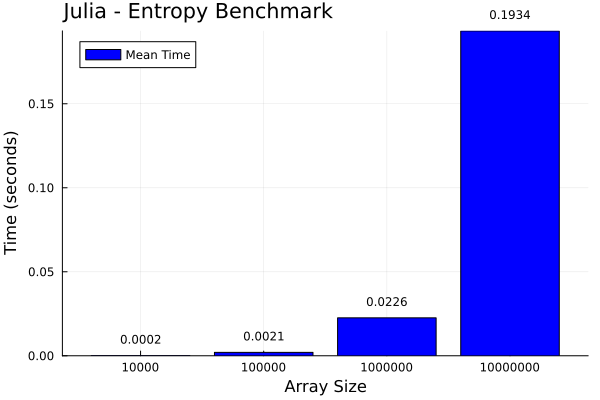

"C:\\Users\\PC\\Desktop\\ICT\\entropy_bm_result.png"

In [39]:
barplot = bar(mean_times, label="Mean Time", color=:blue, legend=:topleft, title="Julia - Entropy Benchmark", titleloc=:left)

xticks!(1:length(sizes), string.(sizes))
xlabel!("Array Size")
ylabel!("Time (seconds)")

for (i, mean_time) in enumerate(mean_times)
    offset = 0.05 * maximum(mean_times) 
    annotate!(i, mean_time + offset, text(string(round(mean_time, digits=4)), :center, 8))
end

display(barplot)

savefig(barplot, "entropy_bm_result.png")

## Mege Sort Benchmarking

In [40]:
function generate_rand_array(min::Int, max::Int, size::Int)
    numbers = rand(min:max, size)
    return numbers
end

generate_rand_array (generic function with 1 method)

In [41]:
function msort_benchmark_stats(min, max, sizes)
    results = []
    for i in sizes
        array = generate_rand_array(min, max, i)
        result = @benchmark merge_sort($array)

        min_time = minimum(result.times) / 1e9
        max_time = maximum(result.times) / 1e9
        mean_time = mean(result.times) / 1e9
        median_time = median(result.times) / 1e9 

        push!(results, (size = i, min = min_time, max = max_time, mean = mean_time, median = median_time))
    end
    return results
end

msort_benchmark_stats (generic function with 1 method)

In [42]:
min_value = 1
max_value = 100000
sizes = [10^i for i in 3:7]

results = msort_benchmark_stats(min_value, max_value, sizes)
foreach(println, results)

(size = 1000, min = 0.0003251, max = 0.0089811, mean = 0.0006262034491503932, median = 0.0004807)
(size = 10000, min = 0.0042922, max = 0.0218512, mean = 0.010170973375262054, median = 0.0101603)
(size = 100000, min = 0.0667931, max = 0.1477109, mean = 0.1106860304347826, median = 0.1159901)
(size = 1000000, min = 1.1180661, max = 1.5559979, mean = 1.370966625, median = 1.40490125)
(size = 10000000, min = 12.9945476, max = 12.9945476, mean = 12.9945476, median = 12.9945476)


In [43]:
mean_times_sort = []
for i in range(1,length(sizes))
    push!(mean_times_sort, results[i][4])
end

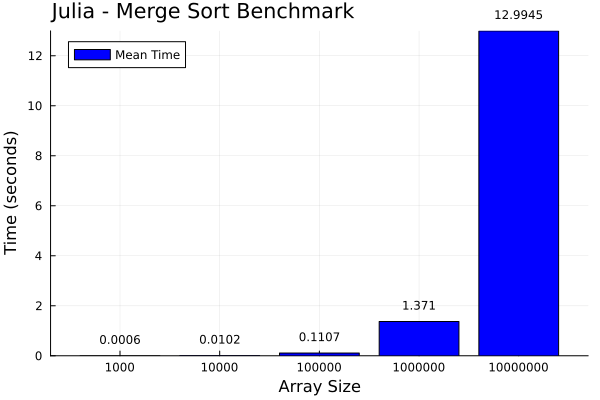

"C:\\Users\\PC\\Desktop\\ICT\\msort_bm_result.png"

In [44]:
barplot = bar(mean_times_sort, label="Mean Time", color=:blue, legend=:topleft, title="Julia - Merge Sort Benchmark", titleloc=:left)

xticks!(1:length(sizes), string.(sizes))
xlabel!("Array Size")
ylabel!("Time (seconds)")

for (i, mean_time) in enumerate(mean_times_sort)
    offset = 0.05 * maximum(mean_times_sort)
    annotate!(i, mean_time + offset, text(string(round(mean_time, digits=4)), :center, 8))
end

display(barplot)

savefig(barplot, "msort_bm_result.png")